In [1]:
from linux_qm.qm.crest.crest import conformer_pipeline
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

normal termination of xtb
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_UNDERFLOW_FLAG IEEE_DENORMAL


num conf: 6
3D: True
energy: -35.00664229
id: 0
3D: True
energy: -35.00639829
id: 1
3D: True
energy: -35.00498393
id: 2
3D: True
energy: -35.00474197
id: 3
3D: True
energy: -35.00272868
id: 4
3D: True
energy: -35.00144818
id: 5


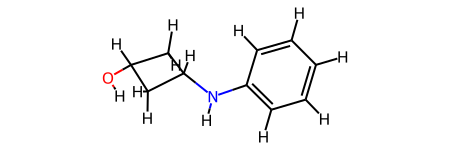

In [2]:
smi = 'OC1CC(Nc2ccccc2)C1'

mol = conformer_pipeline(smi, n_jobs=8)
mol

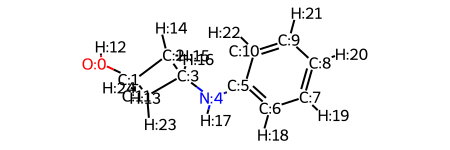

In [34]:
for atom in mol.GetAtoms():
    # if atom.GetSymbol() != 'H':
    atom.SetProp('molAtomMapNumber', str(atom.GetIdx()))
mol

In [35]:
import py3Dmol

AllChem.AlignMolConformers(mol)

# Visualize using Py3Dmol
viewer = py3Dmol.view(width=400, height=400)
for conf in mol.GetConformers():
    mol_block = Chem.MolToMolBlock(mol, confId=conf.GetId())
    # print(conf.GetId())
    viewer.addModel(mol_block, "mol")
viewer.setStyle({"stick": {}})
viewer.setBackgroundColor("white")
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [36]:
AllChem.AlignMolConformers(mol, atomIds=[5, 6 ,7, 8, 9, 10], maxIters=200)

for conf in mol.GetConformers():
    mol_block = Chem.MolToMolBlock(mol, confId=conf.GetId())
    # print(conf.GetId())
    viewer.addModel(mol_block, "mol")
viewer.setStyle({"stick": {}})
viewer.setBackgroundColor("white")
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol